In [1]:
from specim.specfuncs import spec1d
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data =  spec1d.Spec1d('../0712_G0594_001_1d.txt')


Reading spectrum from ../0712_G0594_001_1d.txt
Expected file format: text
 Spectrum Start:     0.00
 Spectrum End:     2045.00
 Dispersion (1st pixel):   1.00
 Dispersion (average):      1.00



In [3]:
pixel_gal = data['wav']
spectra_gal = data['flux']
var_spec_gal = data['var']
sky_spec = data['sky']
#lamda_galaxy_range =  [np.min(lamda_galaxy), np.max(lamda_galaxy)]

<IPython.core.display.Javascript object>


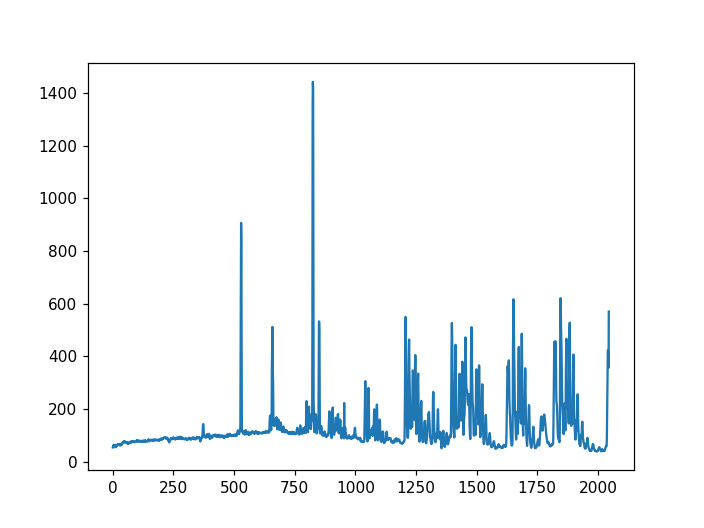

In [4]:
%matplotlib notebook
plt.plot(pixel_gal, sky_spec)

In [5]:
 wav_calb = [(5197.8, 372.5), (5577.0, 528.7), (5889.80, 658.03), (6299.0, 825.0), (6369.0, 850.4), 
            (6498.73, 906.98), (6553.61, 954.0), (6863.98, 1040.56),
            (7276.39, 1206.39), (7523.94, 1320.72), (7571.62, 1340.21),
            (7750.62, 1397.55), (7913.58, 1479.0), (8344.61, 1651.46),
            (8827.01,1845.29)] #(, 1053.82)

In [6]:
sky_data = np.loadtxt('sky_lines.dat')
sky_wav = sky_data[:, 0]
sky_height = sky_data[:, 1]

<IPython.core.display.Javascript object>


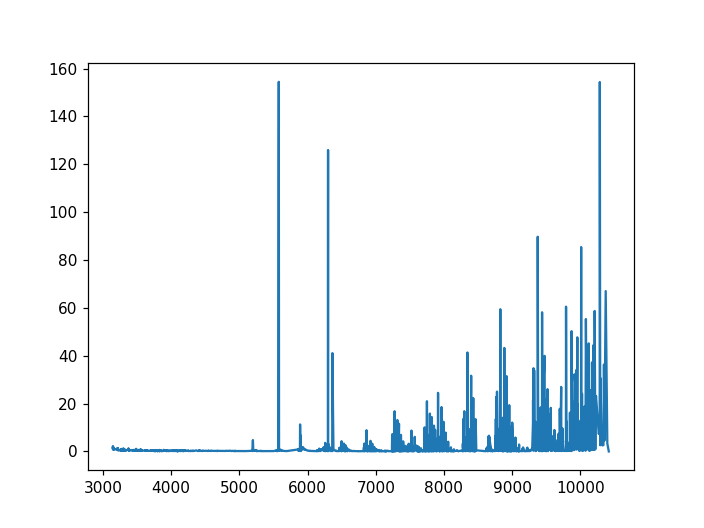

In [7]:
plt.plot(sky_wav, sky_height)
#print(sky_height)

In [8]:
wav_gs = np.zeros(len(wav_calb))
pix_gs = np.zeros(len(wav_calb))
for i, s in enumerate(wav_calb):
    wav_gs[i] = s[0]
    pix_gs[i] = s[1]

param_3 = np.polyfit(pix_gs, wav_gs, deg=3)
wav_fit_3 = np.polyval(param_3, pixel_gal)

param_4 = np.polyfit(pix_gs, wav_gs, deg=4)
wav_fit_4 = np.polyval(param_4, pixel_gal)

param_5 = np.polyfit(pix_gs, wav_gs, deg=5)
wav_fit_5 = np.polyval(param_5, pixel_gal)

<IPython.core.display.Javascript object>


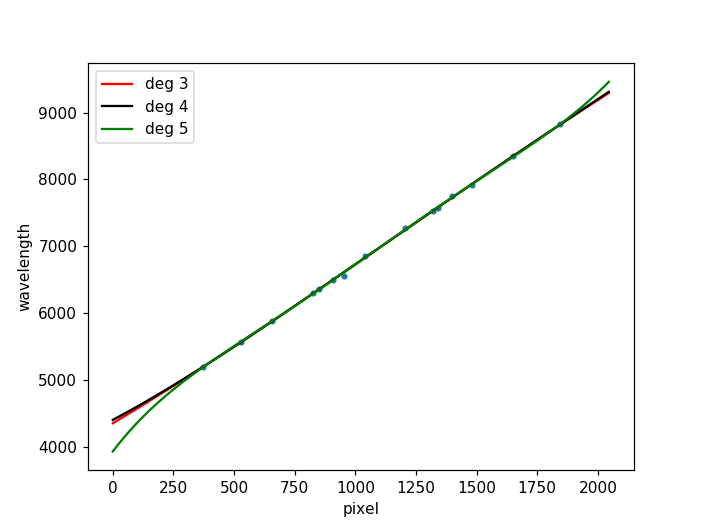

Text(0, 0.5, 'wavelength')

In [9]:
plt.plot(pix_gs, wav_gs, '.')
plt.plot(pixel_gal, wav_fit_3, 'r', label='deg 3')
plt.plot(pixel_gal, wav_fit_4, 'k', label='deg 4')
plt.plot(pixel_gal, wav_fit_5, 'g', label='deg 5')
plt.legend()
plt.xlabel('pixel')
plt.ylabel('wavelength')

<IPython.core.display.Javascript object>


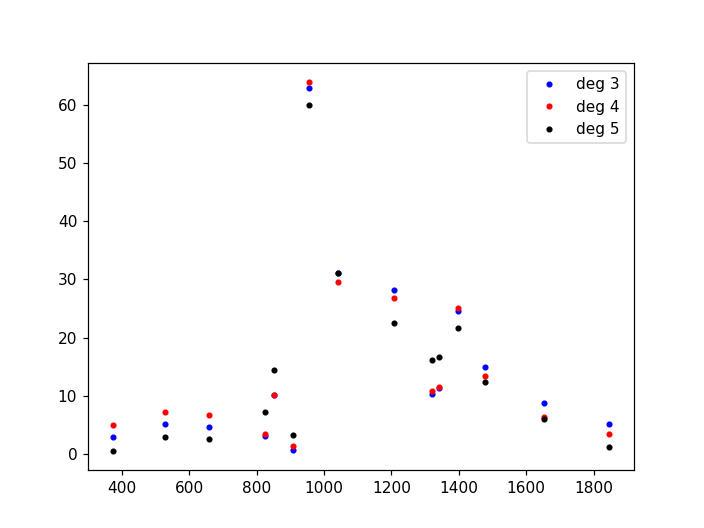

In [10]:
wav_fit_gs_3 = np.polyval(param_3, pix_gs)

wav_fit_gs_4 = np.polyval(param_4, pix_gs)

wav_fit_gs_5 = np.polyval(param_5, pix_gs)

plt.plot(pix_gs, abs(wav_fit_gs_3 - wav_gs), 'b.', label='deg 3')

plt.plot(pix_gs, abs(wav_fit_gs_4 - wav_gs), 'r.', label='deg 4')

plt.plot(pix_gs, abs(wav_fit_gs_5 - wav_gs), 'k.', label='deg 5')

plt.legend()

In [11]:
data['wav'] = wav_fit_3

In [12]:
print(data)

       wav           flux     var      sky 
------------------ ------- ---------- -----
 4358.567048802842  55.681  1793.5783  54.0
 4360.730146666794 135.212  1984.1689  56.0
 4362.893833101431  59.776  2008.1196  61.0
 4365.058107600107 132.477  2139.7124  61.0
 4367.222969656176  68.185   2107.677  64.0
 4369.388418762992  125.73  2056.4611  59.0
 4371.554454413909  74.753  1965.5178  59.0
 4373.721076102282  71.502  1985.4405  60.0
 4375.888283321463 185.189  2173.4484  59.0
4378.0560755648075 -26.694  1922.9044  64.0
               ...     ...        ...   ...
 9268.005442693244  77.052  1432.0939  59.0
 9270.317729949322  44.487  1368.1781  59.0
  9272.62957475155  38.993  1976.8146  87.0
 9274.940976593281 124.339  3947.2326 170.0
 9277.251934967871 122.027  5507.0568 242.0
 9279.562449368674  137.92  8161.0438 361.0
 9281.872519289042 173.732  9582.3369 423.0
 9284.182144222332 182.586  9586.3988 422.0
 9286.491323661896  69.859  9082.2354 408.0
 9288.800057101089 160.617  8100

<IPython.core.display.Javascript object>


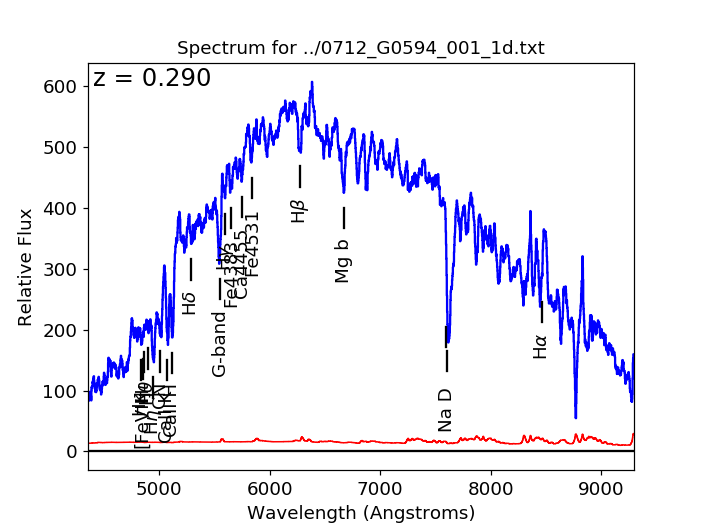


Line        lambda_rest  lambda_obs
----------  -----------  -----------
H-kappa       3750.00       4837.50
[Fe VII]      3761.40       4852.21
H-iota        3770.00       4863.30
H-theta       3797.00       4898.13
H-eta         3835.00       4947.15
CN bandhd     3883.00       5009.07
CaII K        3933.67       5074.43
CaII H        3968.47       5119.33
H-delta       4101.00       5290.29
G-band        4305.00       5553.45
H-gamma       4340.00       5598.60
Fe4383        4383.00       5654.07
Ca4455        4455.00       5746.95
Fe4531        4531.00       5844.99
H-beta        4861.00       6270.69
Mg I (b)      5176.00       6677.04
Na I (D)      5889.95       7598.04
Na I (D)      5895.92       7605.74
H-alpha       6562.80       8466.01



In [13]:
data.smooth(11)
data.mark_lines('abs', z=0.290, usesmooth=True)

In [14]:
data['wav'] = wav_fit_4

In [15]:
print(data)

       wav           flux     var      sky 
------------------ ------- ---------- -----
4408.6604190189955  55.681  1793.5783  54.0
 4410.582926842808 135.212  1984.1689  56.0
 4412.506792499732  59.776  2008.1196  61.0
 4414.432013989791 132.477  2139.7124  61.0
4416.3585893143545  68.185   2107.677  64.0
 4418.286516476138  125.73  2056.4611  59.0
 4420.215793479201  74.753  1965.5178  59.0
 4422.146418328949  71.502  1985.4405  60.0
 4424.078389032133 185.189  2173.4484  59.0
 4426.011703596849 -26.694  1922.9044  64.0
               ...     ...        ...   ...
 9284.683192374017  77.052  1432.0939  59.0
 9287.116585149708  44.487  1368.1781  59.0
 9289.550050118465  38.993  1976.8146  87.0
 9291.983588018078 124.339  3947.2326 170.0
  9294.41719958769 122.027  5507.0568 242.0
 9296.850885567781  137.92  8161.0438 361.0
 9299.284646700182 173.732  9582.3369 423.0
 9301.718483728066 182.586  9586.3988 422.0
 9304.152397395952  69.859  9082.2354 408.0
 9306.586388449708 160.617  8100

<IPython.core.display.Javascript object>


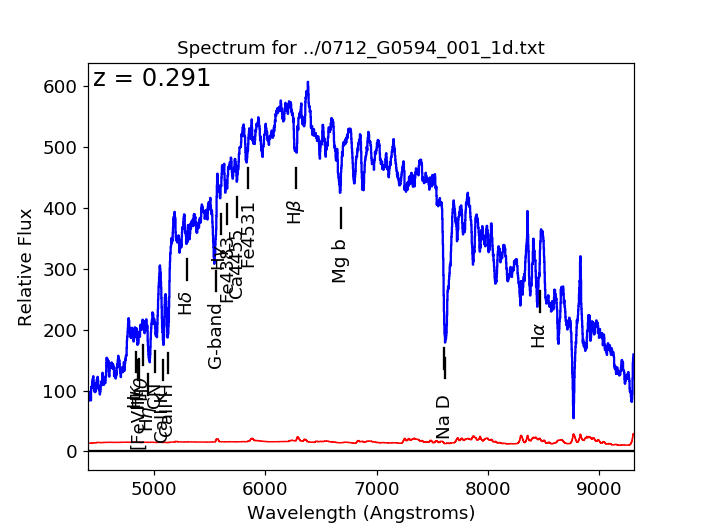


Line        lambda_rest  lambda_obs
----------  -----------  -----------
H-kappa       3750.00       4841.25
[Fe VII]      3761.40       4855.97
H-iota        3770.00       4867.07
H-theta       3797.00       4901.93
H-eta         3835.00       4950.98
CN bandhd     3883.00       5012.95
CaII K        3933.67       5078.37
CaII H        3968.47       5123.29
H-delta       4101.00       5294.39
G-band        4305.00       5557.76
H-gamma       4340.00       5602.94
Fe4383        4383.00       5658.45
Ca4455        4455.00       5751.40
Fe4531        4531.00       5849.52
H-beta        4861.00       6275.55
Mg I (b)      5176.00       6682.22
Na I (D)      5889.95       7603.93
Na I (D)      5895.92       7611.63
H-alpha       6562.80       8472.57



In [16]:
data.smooth(11)
data.mark_lines('abs', z=0.291, usesmooth=True)

In [17]:
data['wav'] = wav_fit_5

In [18]:
print(data)

       wav           flux     var      sky 
------------------ ------- ---------- -----
 3937.625982272568  55.681  1793.5783  54.0
 3942.392673659968 135.212  1984.1689  56.0
 3947.148164007933  59.776  2008.1196  61.0
 3951.892489924093 132.477  2139.7124  61.0
 3956.625687943143  68.185   2107.677  64.0
3961.3477945269055  125.73  2056.4611  59.0
 3966.058846064402  74.753  1965.5178  59.0
 3970.758878871917  71.502  1985.4405  60.0
  3975.44792919307 185.189  2173.4484  59.0
  3980.12603319888 -26.694  1922.9044  64.0
               ...     ...        ...   ...
  9421.05312096659  77.052  1432.0939  59.0
 9424.717855775423  44.487  1368.1781  59.0
 9428.389863878037  38.993  1976.8146  87.0
 9432.069173536727 124.339  3947.2326 170.0
 9435.755813078573 122.027  5507.0568 242.0
 9439.449810895549  137.92  8161.0438 361.0
  9443.15119544456 173.732  9582.3369 423.0
 9446.859995247507 182.586  9586.3988 422.0
 9450.576238891388  69.859  9082.2354 408.0
 9454.299955028328 160.617  8100

<IPython.core.display.Javascript object>


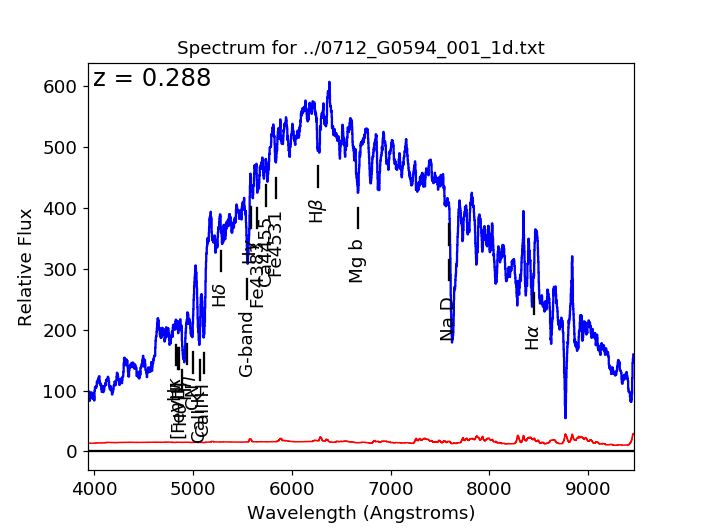


Line        lambda_rest  lambda_obs
----------  -----------  -----------
H-kappa       3750.00       4830.00
[Fe VII]      3761.40       4844.68
H-iota        3770.00       4855.76
H-theta       3797.00       4890.54
H-eta         3835.00       4939.48
CN bandhd     3883.00       5001.30
CaII K        3933.67       5066.57
CaII H        3968.47       5111.39
H-delta       4101.00       5282.09
G-band        4305.00       5544.84
H-gamma       4340.00       5589.92
Fe4383        4383.00       5645.30
Ca4455        4455.00       5738.04
Fe4531        4531.00       5835.93
H-beta        4861.00       6260.97
Mg I (b)      5176.00       6666.69
Na I (D)      5889.95       7586.26
Na I (D)      5895.92       7593.94
H-alpha       6562.80       8452.89



In [19]:
data.smooth(11)
data.mark_lines('abs', z=0.288, usesmooth=True)


/home/pritom/anaconda3/lib/python3.7/site-packages/specim/specfuncs

Reading spectrum from /home/pritom/anaconda3/lib/python3.7/site-packages/specim/specfuncs/Data/uves_skymodel.fits
Expected file format: fitstab
 Spectrum Start:  3400.00
 Spectrum End:    10399.95
 Dispersion (1st pixel): 0
 Dispersion (average):      0.10

Limiting wavelength range for model sky to 3401.000 - 10389.950
Making model sky
--------------------------------------
Model starting wavelength: 3401.000000
Model ending wavelength:    10389.950000
Model dispersion:             0.698900
 Spectrum Start:  3401.00
 Spectrum End:    10389.80
 Dispersion (1st pixel):   0.20
 Dispersion (average):      0.20



<IPython.core.display.Javascript object>


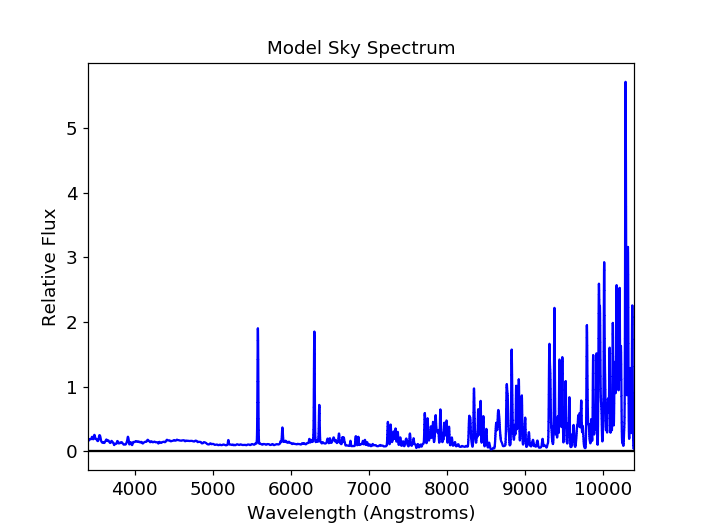

In [20]:
sky = spec1d.make_sky_model(sky_wav, doplot=True)

<IPython.core.display.Javascript object>


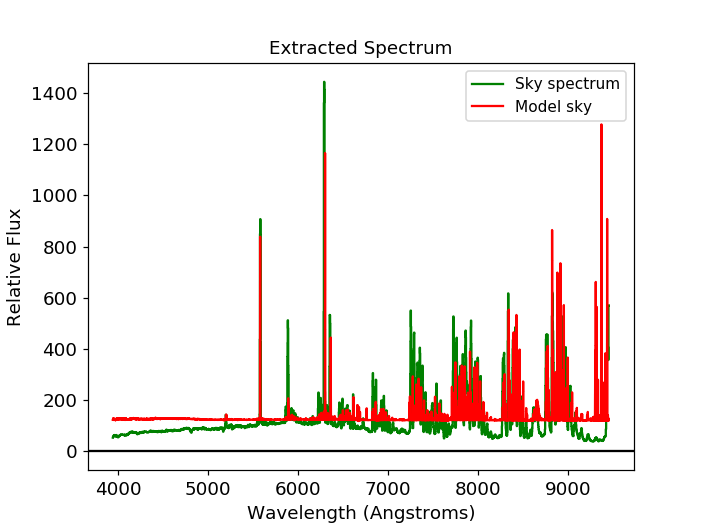


Smoothing sky spectrum with default value of  2.550 Ang

/home/pritom/anaconda3/lib/python3.7/site-packages/specim/specfuncs

Reading spectrum from /home/pritom/anaconda3/lib/python3.7/site-packages/specim/specfuncs/Data/uves_skymodel.fits
Expected file format: fitstab
 Spectrum Start:  3400.00
 Spectrum End:    10399.95
 Dispersion (1st pixel): 0
 Dispersion (average):      0.10

Making model sky
--------------------------------------
Model starting wavelength: 3937.625982
Model ending wavelength:    9458.031172
Model dispersion:             4.766691
 Spectrum Start:  3937.63
 Spectrum End:     9458.03
 Dispersion (1st pixel):   0.20
 Dispersion (average):      0.20

1544.4 18.268380441595944
129.60361681329422 0.19374249226009108


In [21]:
data.check_wavecal()

In [22]:
data.save('0712_wav_calb.txt')


Saved spectrum to file 0712_wav_calb.txt in format text
